## Chapter 9

* 비지도 학습 : 레이블이 없는 데이터로 학습하는 것

* 군집(clustering) : 비슷한 샘플을 클러스터(cluster)로 모음.
* 이상치 탐지 : 정상 데이터가 어떻게 보이는지를 학습한 뒤, 비정상 샘플을 감지하는 데 사용. 결함 제품 감지 등에 사용.
* 밀도 추정 : 데이터셋 생성 확률 과정의 확률 밀도 함수를 추정. 이상치 탐지에 사용. 밀도가 낮은 영역에 놓인 샘플이 이상치일 가능성이 높고, 데이터 분석과 시각화에 도움됨.

### 군집

* 비숫한 샘플들끼리 모아 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 자업.
* 각 샘플은 하나의 그룹에 할당.

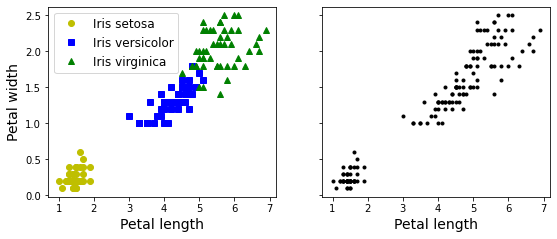

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

data = load_iris()
X = data.data
y = data.target
data.target_names
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

> 왼쪽은 레이블이 있는 데이터, 오른쪽은 레이블이 없는 데이터

* 오른쪽 그래프는 왼쪽 아래의 군집은 구분할 수 있지만, 오른쪽 위의 군집은 하나의 군집으로 보임.
  * 꽃잎 길이 외의 다른 특성도 사용하면 군집 알고리즘이 이를 잘 구별할 수 있음.

* 군집 사용의 예시
  * 고객 분류 : 구매 이력, 사이트 내 행동 등을 기반으로 클러스터로 모음. 추천 시스템 등에 적용 가능.
  * 데이터 분석 : 데이터셋을 분석할 때 군집 알고리즘을 실행햐여 각 클러스터를 따로 분석하면 도움이 됨.
  * 차원 축소 기법 : 각 클러스터에 대한 샘플의 친화성(affinity, 샘플이 클러스터에 얼마나 잘 맞는가)을 측정할 수 있음. 각 샘플의 특성 벡터는 클러스터 친화성 벡터로 바꿀 수 있고, k개의 클러스터가 있다면 k차원이 됨. 원본 특성 벡터보다 저차원이지만 분석을 위한 충분한 정보를 가질 수 있음.
  * 이상치 탐지 : 친화성이 낮은 샘플은 이상치일 가능성이 높음. 제조 분야에서의 결함 감지와 부정 거래 감지에 활용.
  * 준지도 학습 : 레이블된 샘플이 적다면, 군집을 수행해 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있음.
  * 검색 엔진 : 이미지에 군집 알고리즘을 적용한 뒤, 사용자가 입력한 검색어와 유사한 이미지들을 출력하는 데 도움을 줌.
  * 이미지 분할 : 색을 기반으로 픽셀을 클러스터로 모은 뒤, 각 픽셀의 색을 클러스터의 평균 색으로 바꿔 색상의 종류를 감소시킴. 물체의 윤곽 탐지가 쉬워짐.
* 클러스터에 대한 정의는 상황에 따라 다름.
* 어떤 알고리즘은 센트로이드라고 불리는 특정 점을 중심으로 모인 샘플을 찾고, 어떤 알고리즘은 연속된 영역을 찾음.(그 외 여러 종류가 있음.)

* k-평균 : 군집이 형성된 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 간단한 알고리즘

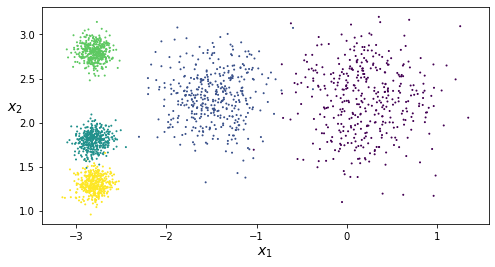

In [2]:
# 5개의 군집으로 이루어진 데이터셋 형성
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()

In [3]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k)       # n_clusters : 알고리즘이 찾을 클러스터의 개수
y_pred = kmeans.fit_predict(X)

In [4]:
y_pred

array([4, 2, 1, ..., 0, 1, 2])

In [5]:
# 각 샘플은 다섯 개의 클래스 중 하나에 할당됨. 군집에서 각 샘플의 레이블은 알고리즘이 샘플에 할당한 클러스터의 인덱스.
# labels_에 훈련된 샘플의 레이블을 가지고 있음.
y_pred is kmeans.labels_

True

In [6]:
# 알고리즘이 찾은 센트로이드
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [7]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 0, 0])

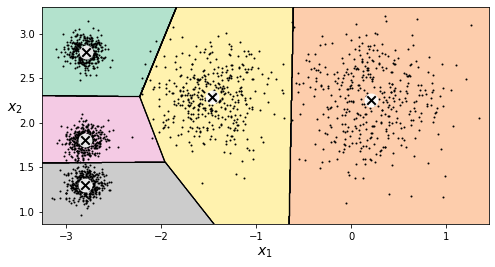

In [8]:
# 보르노이 다이어그램(평면을 특정 점까지의 거리가 가장 가까운 점의 집합으로 분할한 그림) 그리기
# 클러스터의 결정 경계가 됨.
# from https://github.com/rickiepark/handson-ml2/blob/master/09_unsupervised_learning.ipynb
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

* 일부 샘플은 레이블이 잘못 되어있음(왼쪽 위 영역의 결정 경계 부분). k-평균 알고리즘은 샘플을 클러스터에 할당할 때 센트로이드까지의 거리를 고려하는 것이 전부이기 때문에 클러스터의 크기가 많이 다르면 잘 작동하지 않음.
* 하드 군집(hard clustering) : 샘플을 하나의 클러스터에 할당하는 것(위)
* 소프트 군집(soft clustering) : 클러스터마다 샘플에 점수를 부여
  * 점수는 샘플과 센트로이드 사이의 거리, 가우시안 방사 기저 함수와 같은 유사도 점수 등이 될 수 있음.

In [9]:
# 샘플과 각 센트로이드 사이의 거리 반환
# 고차원 데이터셋을 이렇게 변형하면 k차원 데이터셋으로 축소할 수 있음.
kmeans.transform(X_new)

array([[2.9042344 , 0.32995317, 2.81093633, 1.49439034, 2.88633901],
       [5.84739223, 2.80290755, 5.80730058, 4.4759332 , 5.84236351],
       [0.29040966, 3.29399768, 1.21475352, 1.69136631, 1.71086031],
       [0.36159148, 3.21806371, 0.72581411, 1.54808703, 1.21567622]])

* 센트로이드가 주어진다면 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있고, 레이블이 주어진다면 각 클러스터에 속한 샘플의 평균을 계산하여 센트로이드를 구할 수 있음.
* 레이블, 센트로이드가 없다면 센트로이드를 랜덤하게 선정한 뒤(ex. 무작위로 k개의 샘플을 뽑아 그 위치를 센트로이드로 설정), 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 것을 센트로이드에 변화가 없을 때 까지 반복함.
  * 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리가 매 단계마다 낮아지기 때문에 매우 작은 횟수 안에 수렴하게 됨.
  * 샘플 개수, 클러스터 개수, 차원 개수에 선형적인 시간 복잡도를 가짐. 일반적으로는 가장 빠른 군집 알고리즘 중 하나.

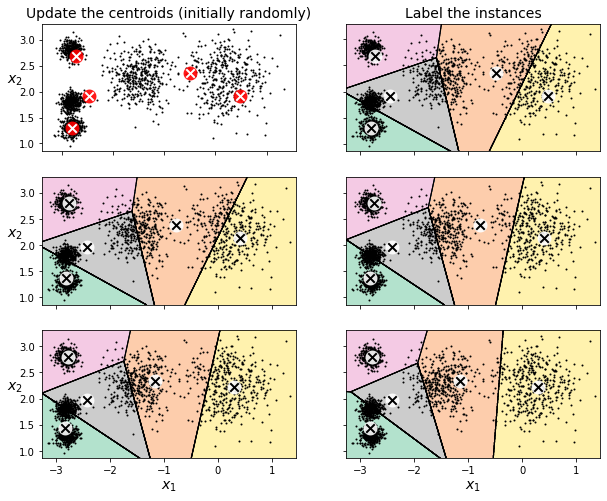

In [10]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

> 왼쪽(처음에는 센트로이드를 랜덤하게 초기화, 나머지는 센트로이드 업데이트)->오른쪽(샘플에 레이블 할당), 위->아래 순

* 처음에 어떻게 센트로이드를 초기화할 수 있느냐에 따라 적절한 솔루션으로 수렴하지 못할 수도 있음.

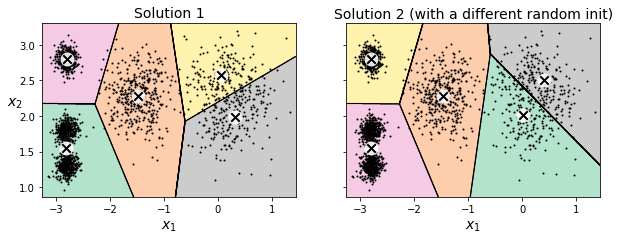

In [11]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=11)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

* 이를 해결하기 위해 또 다른 군집 알고리즘을 수행하는 방식으로 센트로이드 위치를 근사하게 구한 뒤, <code>init</code>매개변수에 초기 센트로이드 위치를 담은 리스트를 지정하고<code>n_init</code>을 1로 설정하면 됨.

In [12]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

* 또는 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고, 가장 좋은 솔루션을 선택하는 것.
* 초기화 횟수는 <code>n_init</code> 으로 조절. (기본값 : 10)
* 최선의 솔루션을 찾기 위한 성능 지표는 이너셔(inertia, 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리)를 사용.
  * 이너셔가 낮을 수록 최선의 모델.

In [13]:
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

In [14]:
# score()는 이너셔의 음수값 반환. scikit-learn의 score()는 클 수록 좋은 것을 의미하므로, 이너셔가 작을수록 좋기 때문에 음수를 붙이면 이너셔가 작을수록 score는 커짐.
kmeans.score(X)

-211.5985372581684

* k-평균++ 알고리즘 : 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계를 개선한 것. 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춤.
  * 1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $\mathbf{e}^{(i)}$를 선택
  * 2. $\displaystyle D\left(\mathbf{x}^{(i)}\right)^2 / \sum_{j=1}^mD\left(\mathbf{x}^{(j)}\right)^2$의 확률로 샘플 $\mathbf{x}^{(i)}$를 새로운 센트로이드 $\mathbf{e}^{(i)}$로 선택. $D\left(\mathbf{x}^{(i)}\right)$는 \mathbf{x}^{(i)}와 이미 선택된 가장 가까운 센트로이드까지의 거리. 이 확률 분포는 이미 선택된 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높임.
  * 3. k개의 센틑로이드가 선택될 때 까지 1, 2를 반복
* <code>KMeans</code>는 위의 방법을 사용. 만약, 완전히 랜덤하게 센트로이드를 선택하고 싶다면 <code>init="random"</code> 지정(사용할 일 없음).

* 삼각 부등식($AC \leq AB+BC$)을 이용하고  샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지해 불필요한 거리 계산을 많이 피함으로써 알고리즘의 속도를 높일 수 있음.
  * <code>KMeans</code>는 위의 방법을 사용. 만약, 사용하지 않으려면 <code>algorithm="full"</code> 지정(사용할 일 없음).
* 전체 데이터셋을 사용하지 않고 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동하는 방법도 존재(속도가 3배에서 4배정도 증가함. 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있음.)
  * 메모리에 들어가지 않는다면 <code>memmap</code>을 이용하거나 partial_fit()등을 사용할 수 있음.
  * 일반 k-평균 알고리즘보다 훨씬 빠르지만 이너셔는 일반적으로 나쁨(특히 클러스터의 개수가 증가하면)

In [15]:
# 미니배치를 이용한 KMeans
# 일반적인 KMeans와 똑같은 사용방법
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

* k-평균을 사용할 때는 클러스터의 개수를 지정해야 하는데, 일반적으로는 그 개수를 찾는 것이 쉽지 않음.
* 잘못 지정시, 상당히 나쁜 모델이 생성됨.
* 또한, 가장 작은 이너셔를 가진 모델을 선택하더라도 제대로 찾지 못함(ex. 위의 데이터셋에서, k=3일때 이너셔는 653.2, k=5(최적)는 211.6, k=8는 119.1)
  * k가 증가할수록 이너셔는 점점 작아짐.
* 클러스터의 개수를 찾기 위해서는 실루엣 점수(silhouette score) 계산. 실루엣 점수는 모든 샘플에 대한 실루엣 계수(silhouette coefifcient)의 평균이고, 실루엣 계수는 $(b-a)/max(a,b)$가 됨.
  * a : 동일한 클러스터에 있는 다른 샘플까지의 평균 거리(클러스터 내부의 평균 거리)
  * b : 가장 가까운 클러스터까지의 평균 거리(샘플과 가장 가까운 클러스터는 자신이 속한 클러스터는 제외하고 b가 최소인 클러스터가 됨.)
  * 실루엣 계수는 -1과 +1사이의 값을 가지고, +1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있다는 의미. 0에 가까우면 클러스터 경계에 있다는 의미이고 -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었다는 의미.
* <code>silhouette_score()</code>를 사용해 실루엣 점수를 계산. 매개변수로는 데이터셋의 모든 샘플과 할당된 레이블을 전달.

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

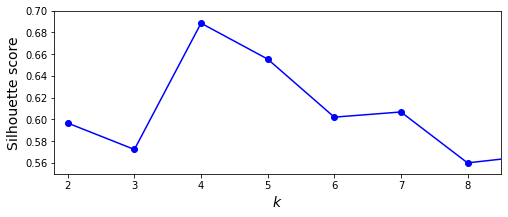

In [17]:
# 클러스터 값에 따른 실루엣 점수 비교

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

> k=4 및 k=5가 좋은 선택

* 모든 샘플의 실루엣 계수를 할당된 클러스터와 계수 값으로 정렬하여 그린 것을 실루엣 다이어그램이라고 함.
  * 높이는 클러스터가 포함하고 있는 샘플의 개수
  * 너비는 클러스터에 포함된 샘플의 정렬된 실루엣 계수(넓을수록 좋음)
  * 붉은색 수직 점선은 각 클러스터 개수에 해당하는 실루엣 점수. 만약, 샘플 대부분이 이 점수보다 낮은 계수를 가지면 클러스터의 샘플이 다른 클러스터랑 너무 가깝다는 의미이므로 나쁜 클러스터임 (k=3와 k=6에서 확인가능)

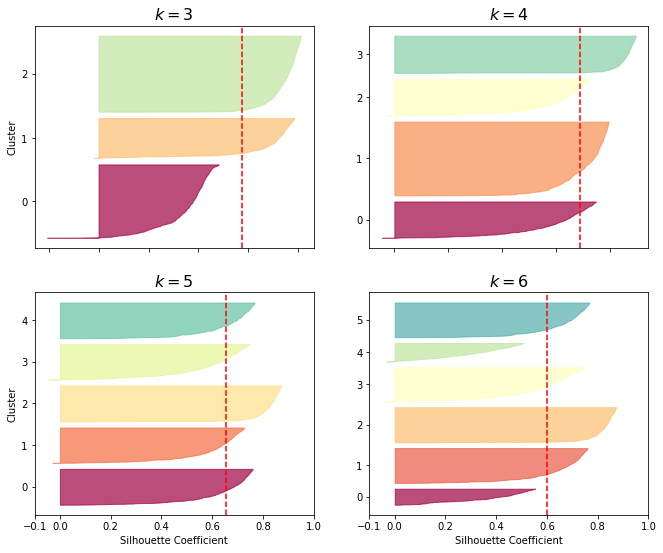

In [18]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

> k=4와 k=5가 좋은 클러스터, k=4일때는 cluster1(주황색)이 특히 크고, k=5일 때는 클러스터의 크기가 비슷하므로 k=5가 더 나은 것.

* k-평균은 속도가 빠르고 확장이 용이하나, 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 수행해야 하고 클러스터 개수를 지정해야 함.
* 또한, 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아니라면 잘 작동하지 않을 수 있음.
* k-평균을 사용하기 전에 스케일을 맞추는 것이 중요. 그렇지 않으면 클러스터가 길어지고 결과가 좋지 않음.

* 이미지 분할 : 이미지를 segment 여러 개로 분할하는 작업.
* 시맨틱 분할(semantic segmentation)에서는 동일한 종류의 물체에 속한 모든 픽셀을 같은 세그먼트에 할당.
  * ex. 자율 주행 자동차의 비전 시스템에서 보행자 이미지를 구성하는 모든 픽셀이 보행자 세그먼트에 할당됨.
* 일반적으로 합성곱 신경망을 사용하지만, 간단하게 하려먼 색상 분할(color segmentation) 사용.

In [19]:
from matplotlib.image import imread
import os
image = imread(os.path.join("images", "ch09", "lady-bug-bugs-ladybug.jpg"))

In [20]:
image.shape

(607, 910, 3)

> * 607 : 높이
> * 910 : 너비
> * 3 : 컬러 채널 개수(RGB, 각 채널 당 0.0~1.0)
>   * 흑백 사진이나 투명도를 담은 사진 등에 따라 채널 수는 바뀔 수 있음

In [21]:
# 이미지를 RGB색상의 긴 리스트로 변환한 뒤 k-평균을 사용해 색상들을 클러스터로 모음.
# 클러스터의 개수는 각 10, 8, 6, 4, 2.
X = image.reshape(-1,3)
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)  # 각 색상별로 클러스터를 만듦.
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]         #
    segmented_imgs.append(segmented_img.reshape(image.shape))       # 색상의 리스트를 원본 이미지와 동일한 크기로 복원

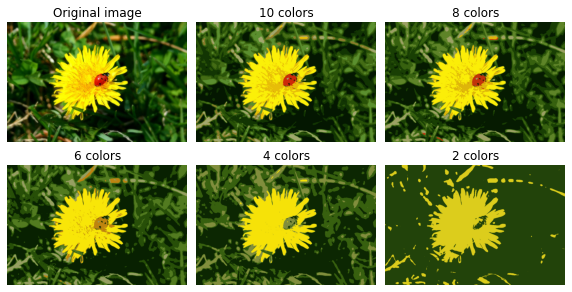

In [22]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx].astype('uint8'))
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
plt.show()

* 군집은 지도 학습 알고리즘을 적용하기 전에 데이터를 전처리하는 데 사용하기도 함(차원 축소).

In [23]:
# MNIST와 비슷한 0~9까지의 숫자를 나타내는 8*8 흑백 이미지 1797개 불러옴
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [25]:
# 로지스틱 회귀 모델로 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [26]:
# 정확도 평가
log_reg.score(X_test, y_test)

0.9622222222222222

In [27]:
# 파이프라인을 이용해 훈련 세트를 50개의 클러스터로 모아 이미지를 50개 클러스터까지 거리로 바꾼 뒤, 로지스틱 회귀 모델을 적용.
# 각 숫자는 손글씨로, 숫자를 쓴 방식이 다르므로 클러스터 개수를 크게 하는 것이 좋음
# multi_class="ovr", solver="lbfgs", max_iter=5000는 ConvergenceWarning을 피하기 위해
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [28]:
pipeline.score(X_test, y_test)

0.9755555555555555

* 변환된 데이터셋이 원본 데이터셋보다 선형적으로 더 잘 구분할 수 있으므로 군집이 로지스틱 회귀를 사용하기에 더 좋음.

In [29]:
# 여기서의 k-평균은 전처리 단계에서 사용하므로 실루엣 분석이나 이너셔 값을 확인할 필요 없이 GridSearchCV를 이용해 최적의 클러스터 개수를 찾을 수 있음.
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             n_jobs=2, param_grid={'kmeans__n_clusters': range(2, 100)},
             verbose=2)

In [30]:
grid_clf.best_params_

{'kmeans__n_clusters': 97}

In [31]:
grid_clf.score(X_test, y_test)

0.98

* 군집은 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 준지도 학습에 사용될 수 있음.

In [32]:
# 첫 50개의 데이터만 학습.
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [33]:
# 데이터 수가 적으므로 정확도 점수 또한 낮음.
log_reg.score(X_test, y_test)

0.82

In [34]:
# 전체 숫자 데이터셋을 50개의 클러스터로 모은 뒤, 각 클러스터에서 센트로이드에 가장 가까운 이미지들을 찾음(대표 이미지)
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

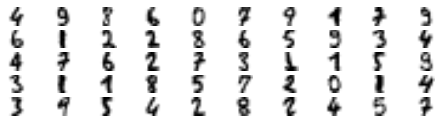

In [35]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [36]:
# 대표 이미지에 수동으로 labeling
y_representative_digits = np.array([6, 3, 7, 4, 9, 0, 5, 4, 8, 8, 1, 2, 5, 7, 2, 7, 3, 5, 3, 2, 4, 6,
       8, 4, 1, 1, 3, 2, 0, 9, 9, 7, 6, 0, 3, 6, 6, 1, 8, 9, 1, 9, 5, 8,
       7, 9, 1, 0, 2, 1])

In [37]:
# 라벨링된 대표 이미지로 로지스틱 회귀 학습
# 각 클러스터를 대표하는 이미지들이므로 score가 더 좋아짐.
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [38]:
log_reg.score(X_test, y_test)

0.12222222222222222

In [39]:
# 대표 이미지의 레이블을 동일한 클러스터에 있는 다른 모든 샘플들에게도 부여(레이블 전파(label propagation))
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [40]:
log_reg.score(X_test, y_test)

0.11333333333333333

In [41]:
# 대표 이미지가 속한 클러스터 내의 이미지들에 동일한 레이블을 전파했으므로 경계에 가까이 위치한 샘플들은 레이블이 잘못 부여되었을수 있으므로,
# 센트로이드와 가까운 샘플의 20%만 레이블을 전파
# 레이블이 있는 전체 데이터셋에서 훈련했을 때의 점수에 가까움
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.13777777777777778

In [42]:
# 일부 전파된 레이블과 전체 전파된 레이블이 99%이상 일치
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.10416666666666667

> * 능동 학습 : 모델과 훈련 세트를 지속적으로 향상시키기 위한 방법. 알고리즘이 요청할 때 특정 샘플의 레이블을 제공.
>   * 주로 불확실성 샘플링(uncertainty sampling)을 많이 사용.
>   * 1) 수집한 레이블된 샘플에서 모델을 훈련한 뒤, 해당 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만듦.
>   * 2) 모델이 가장 불확실하게 예측한 샘플(추정 확률이 낮은 샘플)을 전문가에게 보내 레이블을 붙임
>   * 3) 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때 까지 반복.

* DBSCAN : 또 다른 군집 알고리즘. 밀집된 연속적 지역을 클러스터로 정의
  * 알고리즘이 각 샘플에서 작은 거리인 $\epsilon$내에 샘플이 몇 개 있는지 셈. 이 지역을 샘플의 $\epsilon$-이웃($\epsilon$-neighborhood)이라고 함
  * 자기 자신을 포함해 $\epsilon$-이웃 내에 적어도 <code>min_samples</code>개의 샘플이 있다면 이를 핵심 샘플(core instance)로 간주.
  * 핵심 샘플의 이웃에 있는 모든 샘플을 동일한 클러스터에 포함시킴. 이웃에는 다른 핵심 샘플이 포함될 수 있으므로 이웃의 이웃은 계속해서 하나의 클러스터를 형성.
  * 핵심 샘플도 아니고 이웃도 아닌 샘플은 이상치로 판단.
* 모든 클러스터가 충분히 밀집되어있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 냄.

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

* 모든 샘플의 레이블은 <code>labels_</code>에 저장
  * -1은 이상치로 판단했다는 의미.
  * 핵심 샘플의 index는 <code>core_samples_indices_</code>에 확인 가능.
  * 핵심 샘플 자체는 <code>components_</code>에 저장.

In [44]:
dbscan.labels_

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

In [45]:
len(dbscan.core_sample_indices_)

808

In [46]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [47]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

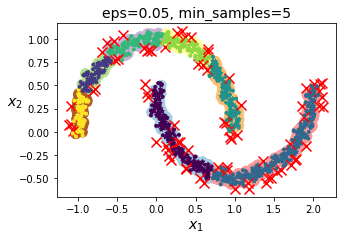

In [48]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)
plt.figure(figsize=(5, 3.2))

plot_dbscan(dbscan, X, size=100)

plt.show()

> * 7개의 클러스터를 만듦.
> * 붉은색 X표시는 이상치로 판단한 데이터

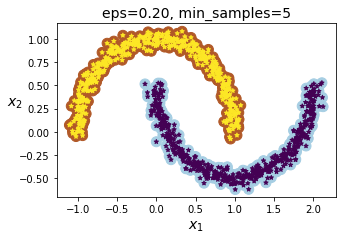

In [49]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

plt.figure(figsize=(5, 3.2))
plot_dbscan(dbscan2, X, size=100)
plt.show()

> * eps를 0.2로 증가시켜 이웃 범위를 넓히면 완벽하게 군집이 나뉨.

* DBSCAN은 predict()가 불가능하고 fit_predict()만 가능. 즉, 새로운 샘플에 대한 클러스터를 예측하는 것이 불가능
  * <code>fit_predict()</code>는 fit()호출 뒤 labels_를 반환하는 것 뿐임.
* 다른 분류 알고리즘이 이런 작업을 더 잘 수행할 수 있기 때문에 이런식으로 구현됨.

In [50]:
# KNeighborsClassifier를 이용한 새로운 샘플의 클러스터 예측

dbscan = dbscan2 # eps=0.2를 기본 dbscan 모델로 사용

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [51]:
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [52]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

* 핵심 샘플에서만 훈련하지 않고 모든 샘플에서 훈련할 수도 있음. 또한, 이상치를 제외할 수도 있음.

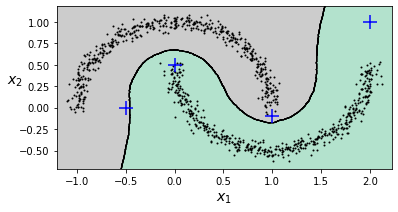

In [53]:
# 결정 경계
# + 는 새로운 데이터 X_new의 위치
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

> * 훈련 세트에 이상치가 없어 클러스터에 멀리 떨어져 있더라도 분류기는 항상 하나의 클러스터를 선택함.
> * 최대 거리를 사용하여 두 클러스터에서 멀리 떨어진 샘플을 이상치로 분류 가능.

In [54]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)   # X_new와 가장 가까운 k개 이웃의 거리와 index를 반환(k개 열을 가진 행렬 두 개를 반환)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1   # 핵심 샘플과의 거리가 0.2보다 크면 이상치(-1)로 분류
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

* DBSCAN은 클러스터의 모양과 개수에 상관없이 감지할 수 있고, 이상치에 안정적이며 하이퍼파라미터가 <code>eps</code>, <code>min_samples</code> 두 개만 존재(클러스터 개수를 지정할 필요가 없음.)
* 단, 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가.
* 시간복잡도는 $O(m\log m)$, eps가 커지면 메모리는 $O(m^2)$만큼 필요

* 다른 군집 알고리즘
  * 병합 군집 : 클러스터 계층을 밑바닥부터 위로 쌓아 구성. 샘플 하나에서 시작해 인접한 클러스터 쌍을 연결. 병합된 클러스터 쌍을 트리로 모두 그리면 클러스터의 이진 트리를 얻을 수 있고, 해당 트리의 leaf는 개별 샘플이 됨. 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지할 수 있고, 특정 클러스터 개수를 선택하는데 도움이 되는 클러스터 트리를 만들 수 있음.
  * BIRCH(balanced iterative reducing and clustering using hierarchies) : 대규모 데이터셋을 위해 고안된 군집 알고리즘. 특성 개수가 너무 많지 않다면(<20) 배치 k-평균보다 빠르고 비슷한 결과를 만듦. 훈련 과정에서 새로운 샘플을 클러스터에 할당할 수 있는 정보를 담은 트리 구조를 만듦. 트리에는 모든 샘플을 저장하지는 않고 제한된 메모리를 사용해 대용량 데이터셋을 다룰 수 있음.
  * 평균-이동 : 각 샘플을 중심으로 하는 원을 그리고 원마다 안에 포함된 샘플의 평균을 구한 뒤 원의 중심을 평균점으로 이동시킴. 모든 원이 움직이지 않을 때 까지 이를 반복. 동일한 지역에 안착한 원에 있는 모든 샘플은 동일한 클러스터가 됨. DBSCAN과 유사하게 모양이나 개수에 상관없이 클러스터를 찾을 수 있고, 하이퍼파라미터도 매우 적음. 클러스터 내부 밀집도가 불균형하면 군집을 여러 개로 나누는 경향이 있고, 복잡도가 $O(m^2)$이므로 대규모 데이터셋에는 부적합.
  * 유사도 전파 : 샘플은 자신을 대표할 수 있는 비슷한 샘플에 투표를 함. 알고리즘이 수렴하면 각 대표와 투표한 샘플들이 클러스터를 형성함. 크기가 다른 여러 개의 클러스터를 감지할 수 있고, 복잡도가 $O(m^2)$이므로 대규모 데이터셋에는 부적합.
  * 스펙트럼 군집 : 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만듦(즉, 차원을 축소시킴.). 이후 이 저차원 공간에서 또 다른 군집 알고리즘(scikit-learn에서는 k-평균 사용)을 사용. 복잡한 클러스터 구조를 감지하고 그래프의 cut을 찾는 데 사용할 수 있지만 샘플 개수가 많거나 클러스터의 크기가 매우 다르면 잘 작동하지 않음.

### 가우시안 혼합

* 가우시안 혼합 모델(Gaussian mixture model, GMM) : 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포(정규분포)에서 생성되었다고 가정하는 확률 모델. 
  * 하나의 가우시안 분포에서 생성된 샘플들은 하나의 클러스터를 형성(일반적으로 타원형)
  * 각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다름.
  * 샘플이 주어지면 가우시안 분포 중 하나에서 생성되었다는 것은 알지만 어떤 분포인지, 분포의 파라미터는 어떤지는 알수 없음.
* GMM 변종 중 하나는 <code>GaussianMixture</code>에 구현. 사용하려면 가우시안 분포의 개수 k를 알아야 함.
  * <code>GaussianMixture</code>는 데이터셋 $\mathbf{X}$ 가 다음 확률 과정을 통해 생성되었다고 가정.
  * 1) 샘플마다 k개의 클러스터에서 랜덤하게 한 클러스터가 선택됨. j번째 클러스터를 선택할 확률은 클러스터의 가중치 $\phi^{(j)}$로 정의. i번째 샘플을 위해 선택한 클러스터의 인덱스는 $z^{(i)}$로 표시
  * 2) $z^{(i)}$=j(i번째 샘플이 j번째 클러스터에 할당)라면 이 샘플의 위치 $\mathbf{x}^{(i)}$는 평균이 $\boldsymbol{\mu}^{(j)}$이고 공분산 행렬이 $\boldsymbol{\Sigma}^{(j)}$인 가우시안 분포에서 랜덤하게 샘플링됨. 이를 $\mathbf{x}^{(i)} \sim \mathcal{N}\left(\boldsymbol{\mu}^{(j)},\boldsymbol{\Sigma}^{(j)}\right)$로 표시함.
* 데이터셋이 주어지면 가중치 $\boldsymbol{\phi}$와 전체 분포의 파라미터 $\boldsymbol{\mu}^{(1)}$~$\boldsymbol{\mu}^{(k)}$, $\boldsymbol{\Sigma}^{(1)}$~$\boldsymbol{\Sigma}^{(k)}$를 추정할 수 있음.

In [55]:
from sklearn.mixture import GaussianMixture

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

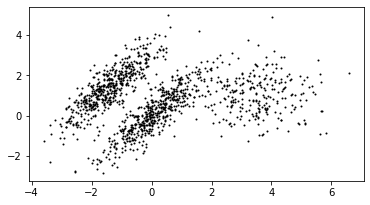

In [56]:
plt.figure(figsize=(6, 3.2))
plot_data(X)
plt.show()

In [57]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [58]:
# 가중치. 오른쪽의 원형 클러스터의 샘플이 250개고, 왼쪽의 클러스터 두 개의 샘플이 각각 500개이므로 실제 가중치는 0.2, 0.4, 0.4이다.
gm.weights_

array([0.39032584, 0.20961444, 0.40005972])

In [59]:
# 평균
gm.means_

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [60]:
# 공분산
gm.covariances_

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

* <code>GaussianMixture</code>클래스는 기댓값-최대화(expectation-maximization, EM) 알고리즘을 사용함.
  * 클러스터 파라미터를 랜덤하게 초기화하고, 수렴할 때 까지 두 단계를 반복
  * 먼저, 샘플을 클러스터에 할당한 뒤(기댓값 단계), 클러스터를 업데이트함(최대화 단계)
  * 군집 입장에서는 클러스터 중심($\boldsymbol{\mu}^{(1)}$~$\boldsymbol{\mu}^{(k)}$)과 클러스터의 크기, 모양, 방향($\boldsymbol{\Sigma}^{(1)}$~$\boldsymbol{\Sigma}^{(k)}$), 상대적 가중치($\boldsymbol{\phi}^{(1)}$~$\boldsymbol{\phi}^{(k)}$)를 찾는 k-평균의 일반화로 생각할 수 있음.
  * 소프트 클러스터 할당을 사용(기댓값 단계에서 각 클러스터에 속할 확률을 예측한 뒤, 최대화 단계에서 각 클러스터가 데이터셋에 있는 모든 샘플을 사용해 업데이트. 클러스터에 속할 추정 확률(책임(expectation)이라고 함.)로 가중치가 적용됨.)
  * EM 또한 나쁜 솔루션으로 수렴할 수 있으므로 <code>n_init</code>을 적당한 크기로 조절

In [61]:
# 알고리즘의 수렴 여부
gm.converged_

True

In [62]:
# 알고리즘의 반복 횟수
gm.n_iter_

4

* 각 클러스터의 위치, 크기, 모양, 방향, 상대적인 가중치를 예측했으므로 새로운 샘플을 가장 비슷한 클러스터에 쉽게 할당할 수 있음(하드 군집, <code>predict()</code>). 또는 특정 클러스터에 속할 확률을 예측할 수 있음(소프트 군집<code>predict_proba()</code>).

In [63]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [64]:
gm.predict_proba(X)

array([[9.76815996e-01, 2.31833274e-02, 6.76282339e-07],
       [9.82914418e-01, 1.64110061e-02, 6.74575575e-04],
       [7.52377580e-05, 1.99781831e-06, 9.99922764e-01],
       ...,
       [4.31902443e-07, 9.99999568e-01, 2.12540639e-26],
       [5.20915318e-16, 1.00000000e+00, 1.45002917e-41],
       [2.30971331e-15, 1.00000000e+00, 7.93266114e-41]])

* 가우시안 혼합 모델은 모델로부터 새로운 샘플을 만들 수 있는 생성 모델(generative model)임.

In [65]:
# 변환된 샘플은 클러스터 인덱스 순으로 정렬
X_new, y_new = gm.sample(6)

In [66]:
X_new

array([[ 1.46921924,  1.07462768],
       [-1.10446906, -1.10835356],
       [ 0.76910811,  1.52815166],
       [ 3.78890082,  1.36004494],
       [-1.88725051,  2.1031859 ],
       [-1.32382538,  1.29490494]])

In [67]:
y_new

array([0, 0, 0, 1, 2, 2])

* 주어진 위치에서 <code>score_samples()</code>를 이용해 모델의 밀도를 추정할 수 있음. 샘플이 주어지면 그 위치의 확률 밀도 함수의 log를 예측(높을수록 밀도가 높음)
  * 나온 점수들의 지숫값을 계산하면 각 샘플의 위치에서 PDF값을 얻을 수 있고, 샘플이 특정 지역 안에 속할 확률을 예측하려면 그 지역에 대해 PDF를 적분해야 함.

In [68]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

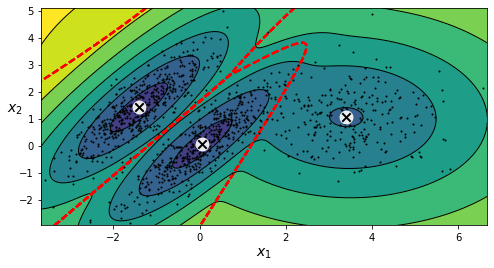

In [69]:
# 클러스터 평균, 결정 경계(붉은색 파선), 밀도 등고선 출력
# from https://github.com/rickiepark/handson-ml2/blob/master/09_unsupervised_learning.ipynb
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.show()

* 특성이나 클러스터가 많거나, 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어려움.
* 어려움을 줄이기 위해 알고리즘이 학습할 파라미터 개수를 제한해야 하고, 이를 위한 방법 중 하나는 클러스터의 모양과 방향의 범위를 제한하는 것이 있음.
  * 공분산 행렬에 제약을 추가하는 것으로 가능
  * <code>covariance_type</code> 매개변수의 값에 따라 설정 가능
    * <code>"spherical"</code> : 모든 클러스터가 원형
    * <code>"diag"</code> : 크기에 상관없이 어떤 타원형도 가능. 단, 타원의 축은 좌표 축과 나란해야 함(공분산 행렬이 대각 행렬이어야 함.)
    * <code>"tied"</code> : 모든 클러스터가 동일한 타원, 모양, 크기, 방향을 가짐(모든 클러스터가 동일한 공분산 행렬을 공유)
    * <code>"full"</code>(default) : 제약 없음

In [70]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full")
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied")
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical")
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag")

gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10)

In [71]:
def compare_gaussian_mixtures(gm1, gm2, gm3, gm4, X):
    plt.figure(figsize=(12, 10))

    plt.subplot(221)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(222)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

    plt.subplot(223)
    plot_gaussian_mixture(gm3, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm3.covariance_type), fontsize=14)

    plt.subplot(224)
    plot_gaussian_mixture(gm4, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm4.covariance_type), fontsize=14)

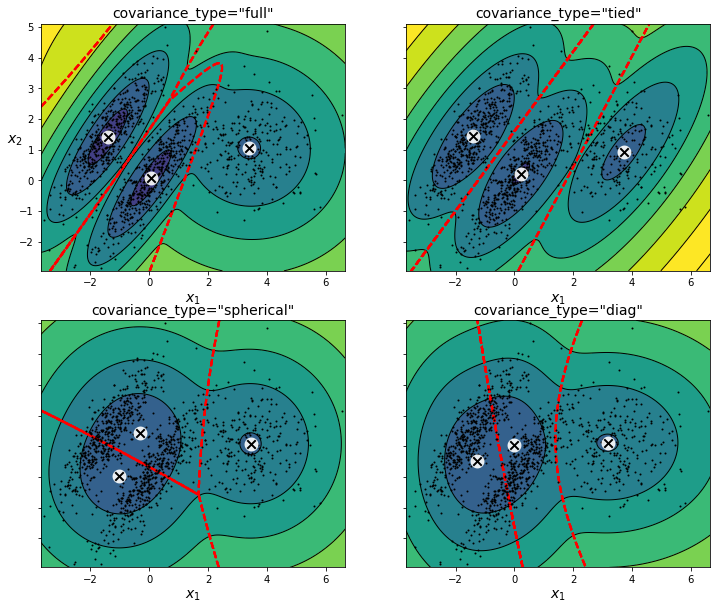

In [72]:
compare_gaussian_mixtures(gm_full, gm_tied, gm_spherical, gm_diag, X)
plt.show()

* 샘플 수가 m, 차원 수가 n, 클러스터 개수 k가 있을 때, 계산 복잡도는 "spherical", "diag"에서는 $O(kmn)$, "tied"나 "full"에서는 $O(kmn^2+kn^3)$.

* 이상치(outlier)는 보통과 많이 다른 샘플, 정상치(inlier)는 보통 샘플을 의미. 이상치를 감지하는 작업을 이상치 탐지(outlier detection)라고 하고, 가우시안 혼합을 이용해 가능.
  * 데이터셋을 정제하는 데 자주 사용. 가우시안 혼합 모델은 이상치를 포함한 모든 데이터에 맞추려 하므로 이상치가 너무 많으면 일부 이상치를 정상으로 잘못 생각할 수 있음. 이를 막기 위해 모델을 훈련한 뒤 가장 크게 벗어난 이상치를 제거하고, 정제된 데이터셋에서 모델을 다시 훈련하거나, <code>EllipticEnvelope</code> 클래스를 사용해 안정적인 공분산 추정 방법을 사용할 수 있음.
  * 밀도가 낮은 지역의 모든 샘플을 이상치로 볼 수 있음.
  * 이를 위해 밀도 임곗값을 정해야 함. 거짓 양성이 너무 많다면 임곗값을 낮추고, 거짓 음성이 너무 많다면 임곗값을 높임.

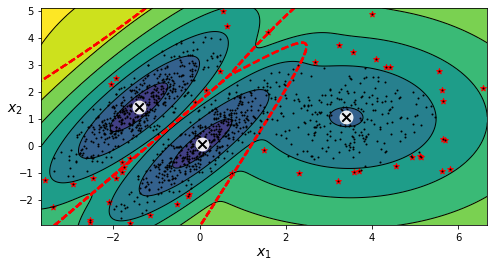

In [73]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4) # 4%를 밀도 임곗값으로 사용
anomalies = X[densities < density_threshold]

# 이상치를 붉은색 점으로 표시
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.show()

* 가우시안 혼합 모델에서는 클러스터의 개수를 선택하기 위해 이너셔와 같은 수치 대신, BIC(bayesian information centrion)와 AIC(akaike information centrion)와 같은 이론적 정보 기준을 최소화하는 모델을 찾음.
  * $\text{BIC}=\log(m)p-2\log\left(\hat{L}\right)$
  * $\text{AIC}=2p-2\log\left(\hat{L}\right)$
  * m : 샘플의 개수
  * p : 모델이 학습할 파라미터 개수
  * $\hat{L}$ : 모델의 가능도 함수(likelihood)의 최댓값
> * 가능도 함수 : 파라미터 $\mathbf{0}$인 확률 모델이 주어지면 출력 $\mathbf{x}$을 알고 있을 때 $\mathbf{0}$가 얼마나 그럴듯한지 설명.
* 학습할 파라미터가 많은 모델(클러스터가 많은 모델)에 벌칙을 가하고, 데이터에 잘 학습하는 모델에게 보상을 더하는 방식으로 동작
* 두 모델은 일반적으로 동일한 모델을 선택하지만, 선택이 다르다면 BIC가 선택한 모델이 더 간단한 경향이 있으나 데이터에 아주 잘 맞지 않을 수 있음(특히 데이터셋이 크면)

In [74]:
gm.bic(X)

8189.733705221635

In [75]:
gm.aic(X)

8102.508425106597

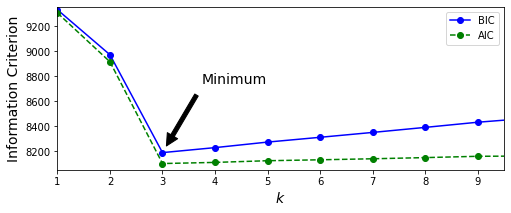

In [76]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

> * k=3일 때 BIC와 AIC의 값이 가장 작으므로 클러스터의 개수는 3개일 때가 가장 최선으로 보임.
> * <code>covariance_type</code> 매개변수에 따라 최선의 값을 선택할 수도 있음. "full"대신 "spherical"을 선택하면 학습할 매개변수는 줄어드나, 데이터에 잘 맞지 않게 될 수 있음.

* 직접 클러스터 개수를 찾지 않고 불필요한 클러스터의 가중치를 0(에 가깝게)으로 만드는 <code>BayesianGaussinaMixture</code> 클래스를 사용할 수 있음.
* 클러스터 개수인 <code>n_components</code>를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정.
* 클러스터 파라미터(가중치, 평균, 공분산 행렬 등)는 고정된 모델 파라미터가 아닌, 잠재 확률 변수로 취급. $\mathbf{z}$는 클러스터 파라미터와 클러스터 할당을 모두 포함.
* 베타 분포(beta distribution) :  고정 범위(여기서는 0~1)안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용.
  * ex) SBP(Stick breaking process)에서 $\Phi=[0.3, 0.6, 0.5, ...]$를 가정하면 샘플의 30%는 클러스터 0에 할당하고 남은 샘플 60%를 클러스터 1에 할당, 또 남은 샘플 50%를 클러스터 2에 할당. 새로운 샘플이 작은 클러스터보다 큰 클러스터에 포함될 가능성이 높은 데이터셋에 잘 맞음. 농도 $a$가 크면 $\Phi$ 값이 0에 가깝게 되고 SBP는 많은 클러스터를 만듦.
* 위샤트 분포(wishart distribution) : 공분산 행렬을 샘플링할 때 사용. 파라미터 d, V가 클러스터의 분포 모양을 제어함.
* 잠재 변수 $\mathbf{z}$에 대한 사전 지식이 사전 확률이라는 확률 분포 $p(\mathbf{x})$에 인코딩될 수 있음.
  * 클러스터가 적거나 풍부하다고 믿을 수 있음.
  * $<code>weight_concentration_prior</code>를 사용해 조정 가능.
  * 데이터가 많을 수록 사전 믿음은 중요하지 않음.

> * https://homl.info/bda
> * https://www.edwidth.org/bayesiandeeplearning

In [79]:
# 자동으로 불필요한 클러스터를 제거. 자동으로 3개의 클러스터가 필요하다는 것을 감지함(0.4, 0.21, 0.39)
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

* 이상치 탐지 및 특이치 탐지를 위한 다른 알고리즘
  * PCA : 샘플의 재구성 오차와 이상치 재구성 오차를 비교하면 보통 이상치 재구성 오차가 훨씬 큼. 이를 이용해 쉽게 이상치를 탐지할 수 있음.
  * Fast-MCD : <code>EllipticEnvelope</code>에서 사용가능. 데이터셋 정제 시 유용. 정상치가 하나의 가우시안 분포에서 생성되었다고 가정하고, 이 가우시안 분포에서 생성되지 않은 이상치로 데이터셋이 오염되었다고 가정함. 알고리즘이 가우시안 분포릐 파라미터(타원형)를 추정할 때 이상치로 의심되는 샘플을 무시함.
  * isolation forest : 고차원 데이터셋에서 이상치 감지에 효율적. 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트를 만들어, 각 노드에서 특성을 랜덤하게 선택해 랜덤한 임계값으로 데이터셋을 둘로 나눔. 이 과정을 반복하면 모든 샘플이 다른 샘플과 격리되고, 이상치는 일반적으로 다른 샘플과 멀리 떨어져 있으므로 정상 샘플과 적은 단계에서 격리됨.
  * LOF : 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교
  * one-class SVM : 특이치 탐지에 적절. 모든 샘플을 고차원 공간에 매핑한 다음, 선형 SVM 분류기를 이용해 두 클래스를 분리함(원본 공간에서 모든 샘플을 둘러싼 작은 영역을 찾는 것에 해당). 새로운 샘플이 이 영역에 들어가지 않는다면 이상치로 판단. 고차원 데이터셋에 대해서 잘 작동함.

----------

### ex10

#### olivetti face 데이터셋 불러오기

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [15]:
olivetti.data.shape

(400, 4096)

In [16]:
olivetti.images.shape

(400, 64, 64)

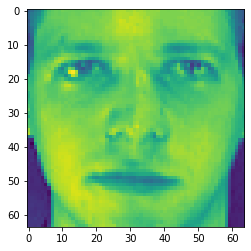

In [20]:
plt.imshow(olivetti.images[0])

In [18]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

#### train, validation, test 분리(계층적 샘플링 이용)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [39]:
split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_index, test_index = next(split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_index]
y_train_valid = olivetti.target[train_valid_index]
X_test = olivetti.data[test_index]
y_test = olivetti.target[test_index]

split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)
train_index, valid_index = next(split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_index]
y_train = y_train_valid[train_index]
X_valid = X_train_valid[valid_index]
y_valid = y_train_valid[valid_index]

In [40]:
X_train.shape

(280, 4096)

In [41]:
y_train.shape

(280,)

In [42]:
X_valid.shape

(80, 4096)

In [43]:
y_valid.shape

(80,)

In [44]:
X_test.shape

(40, 4096)

In [45]:
y_test.shape

(40,)

#### K-평균 사용

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train)

KMeans(n_clusters=10)

In [50]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train, kmeans.labels_)

0.08911965

In [57]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(5, 150, 5)]


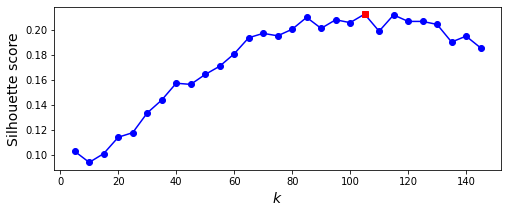

In [64]:
silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k]

best_k = range(5, 150, 5)[np.argmax(silhouette_scores)]

plt.figure(figsize=(8, 3))
plt.plot(range(5, 150, 5), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.plot(best_k, silhouette_scores[np.argmax(silhouette_scores)], "rs")

plt.show()

In [65]:
# 최적의 클러스터 개수
best_k

105

In [66]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=105, random_state=42)

cluster : 0


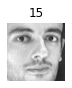

cluster : 1


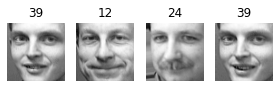

cluster : 2


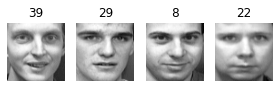

cluster : 3


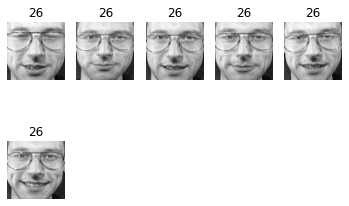

cluster : 4


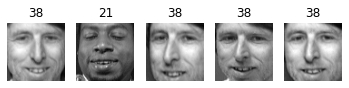

cluster : 5


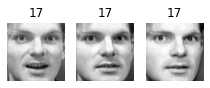

cluster : 6


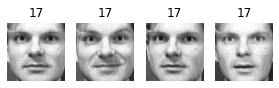

cluster : 7


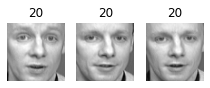

cluster : 8


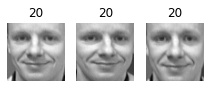

cluster : 9


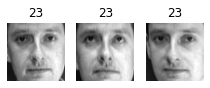

cluster : 10


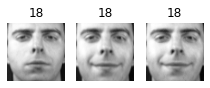

cluster : 11


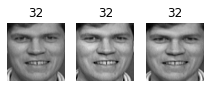

cluster : 12


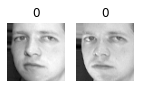

cluster : 13


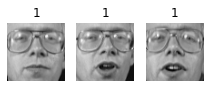

cluster : 14


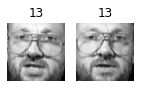

cluster : 15


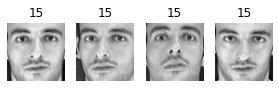

cluster : 16


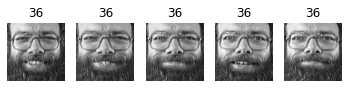

cluster : 17


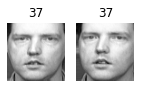

cluster : 18


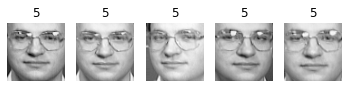

cluster : 19


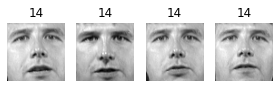

cluster : 20


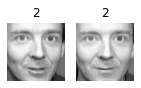

cluster : 21


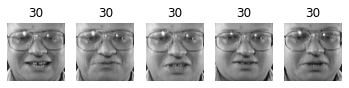

cluster : 22


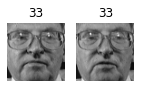

cluster : 23


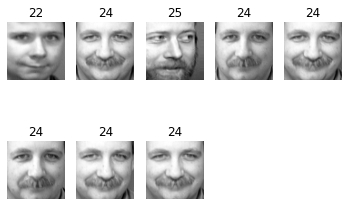

cluster : 24


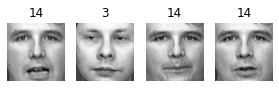

cluster : 25


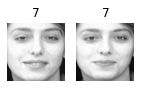

cluster : 26


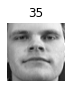

cluster : 27


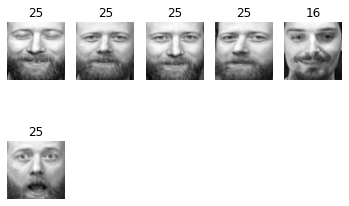

cluster : 28


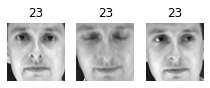

cluster : 29


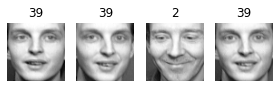

cluster : 30


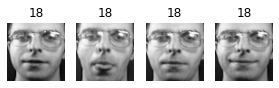

cluster : 31


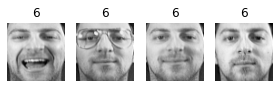

cluster : 32


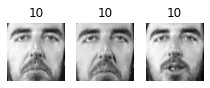

cluster : 33


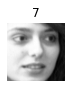

cluster : 34


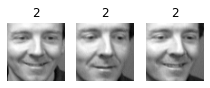

cluster : 35


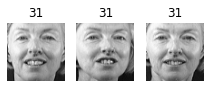

cluster : 36


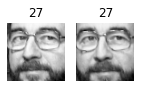

cluster : 37


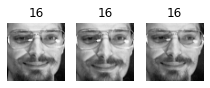

cluster : 38


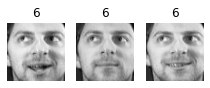

cluster : 39


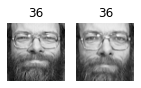

cluster : 40


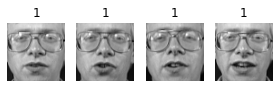

cluster : 41


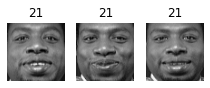

cluster : 42


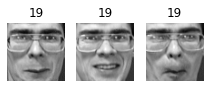

cluster : 43


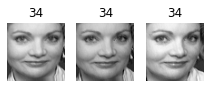

cluster : 44


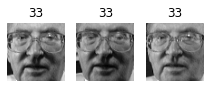

cluster : 45


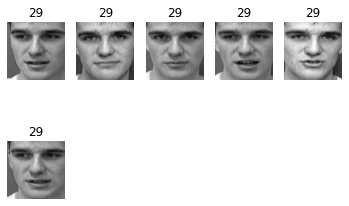

cluster : 46


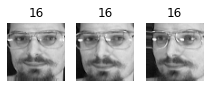

cluster : 47


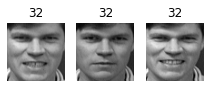

cluster : 48


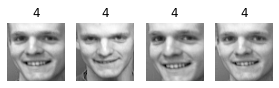

cluster : 49


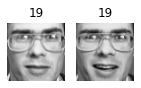

cluster : 50


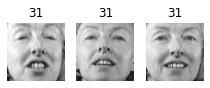

cluster : 51


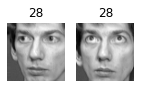

cluster : 52


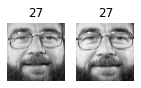

cluster : 53


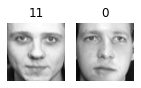

cluster : 54


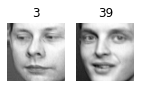

cluster : 55


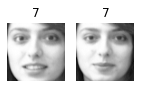

cluster : 56


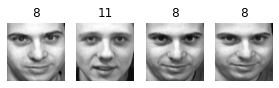

cluster : 57


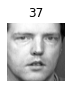

cluster : 58


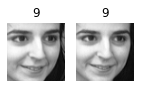

cluster : 59


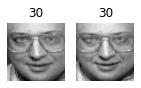

cluster : 60


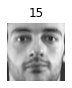

cluster : 61


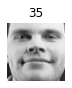

cluster : 62


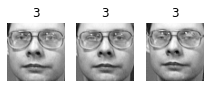

cluster : 63


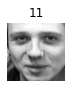

cluster : 64


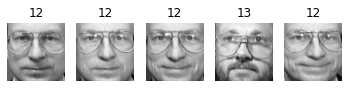

cluster : 65


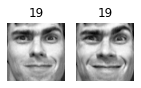

cluster : 66


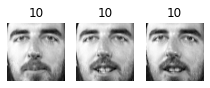

cluster : 67


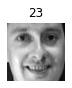

cluster : 68


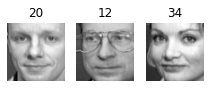

cluster : 69


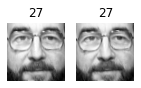

cluster : 70


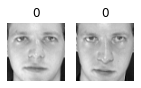

cluster : 71


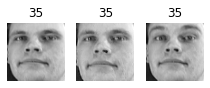

cluster : 72


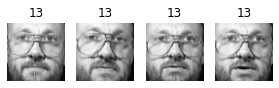

cluster : 73


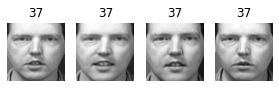

cluster : 74


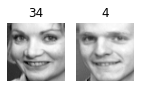

cluster : 75


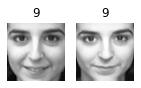

cluster : 76


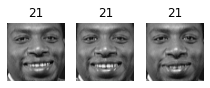

cluster : 77


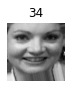

cluster : 78


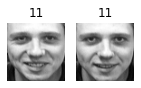

cluster : 79


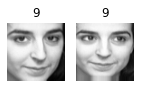

cluster : 80


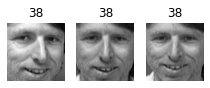

cluster : 81


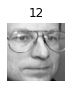

cluster : 82


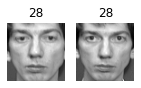

cluster : 83


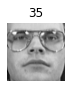

cluster : 84


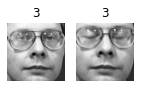

cluster : 85


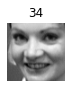

cluster : 86


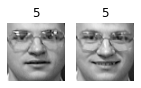

cluster : 87


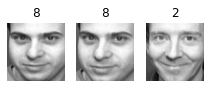

cluster : 88


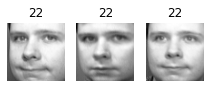

cluster : 89


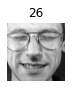

cluster : 90


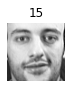

cluster : 91


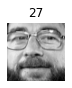

cluster : 92


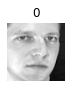

cluster : 93


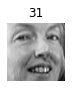

cluster : 94


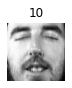

cluster : 95


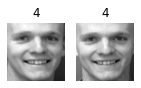

cluster : 96


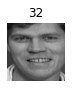

cluster : 97


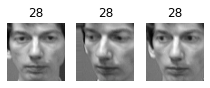

cluster : 98


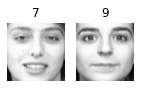

cluster : 99


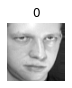

cluster : 100


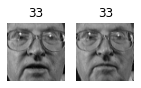

cluster : 101


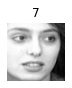

cluster : 102


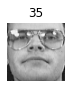

cluster : 103


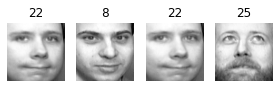

cluster : 104


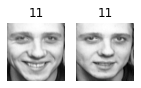

In [100]:
for clusterid in np.unique(kmeans.labels_):
    print(f"cluster : {clusterid}")
    for index, (face, label) in enumerate(zip(X_train[kmeans.labels_==clusterid], y_train[kmeans.labels_==clusterid])) :
        face = face.reshape(64, 64)
        plt.subplot(2, 5, index+1)
        plt.title(label)
        plt.axis("off")
        plt.imshow(face, cmap="gray")
    plt.show()

### ex11

In [102]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_valid, y_valid)

0.95

In [109]:
X_train_reduced = kmeans.transform(X_train)
X_valid_reduced = kmeans.transform(X_valid)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
clf.score(X_valid_reduced, y_valid)

0.625